In [43]:
import pandas as pd
import numpy as np

In [44]:
movie=pd.read_csv(r"C:\Users\Lenovo\Desktop\Shreya\movie_data\movies.csv")

In [45]:
rating=pd.read_csv(r"C:\Users\Lenovo\Desktop\Shreya\movie_data\ratings.csv")

In [46]:
tag=pd.read_csv(r"C:\Users\Lenovo\Desktop\Shreya\movie_data\tags.csv")

In [47]:
link=pd.read_csv(r"C:\Users\Lenovo\Desktop\Shreya\movie_data\links.csv")

In [48]:
movie.shape

(9742, 3)

In [49]:
rating.shape

(100836, 4)

In [50]:
rating.userId.nunique()

610

In [51]:
ratings_count = rating.groupby('movieId').size().reset_index(name='rating_count')
movie_ratings = pd.merge(ratings_count, movie, on='movieId')
most_rated_movie = movie_ratings.loc[movie_ratings['rating_count'].idxmax()]
print(f"The movie with the maximum number of ratings is: {most_rated_movie['title']} with {most_rated_movie['rating_count']} ratings.")

The movie with the maximum number of ratings is: Forrest Gump (1994) with 329 ratings.


In [52]:
matrix_movie_id = movie[movie['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tag[tag['movieId'] == matrix_movie_id]['tag'].unique()
print(f"Tags submitted for 'Matrix, The (1999)': {list(matrix_tags)}")


Tags submitted for 'Matrix, The (1999)': ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [53]:
terminator_movie_id = movie[movie['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter the ratings associated with this movieId
terminator_ratings = rating[rating['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

# Display the result
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


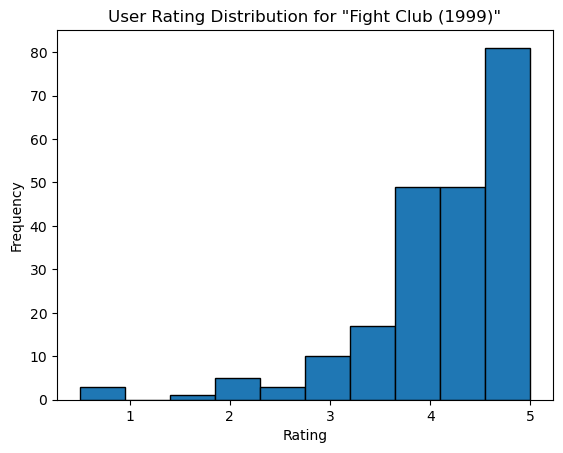

In [54]:
import pandas as pd
import matplotlib.pyplot as plt



# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movie[movie['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter the ratings associated with this movieId
fight_club_ratings = rating[rating['movieId'] == fight_club_movie_id]['rating']

# Plot the distribution of ratings
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('User Rating Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [55]:
# Step 1: Group by movieId and aggregate
rating_counts = rating.groupby('movieId').size()
rating_means = rating.groupby('movieId')['rating'].mean()

# Create a DataFrame with the aggregated data
rating_summary = pd.DataFrame({
    'count': rating_counts,
    'mean': rating_means
}).reset_index()

# Step 2: Inner join with movies DataFrame
movies_with_ratings = pd.merge(movie, rating_summary, on='movieId')

# Step 3: Filter movies with more than 50 ratings
popular_movies = movies_with_ratings[movies_with_ratings['count'] > 50]

# Find the movie with the highest average rating
most_popular_movie = popular_movies.sort_values(by='mean', ascending=False).iloc[0]

print(most_popular_movie[['title', 'mean']])

title    Shawshank Redemption, The (1994)
mean                             4.429022
Name: 277, dtype: object


In [56]:
#Step 1: Group by movieId and aggregate
rating_counts = rating.groupby('movieId').size()
rating_means = rating.groupby('movieId')['rating'].mean()

# Create a DataFrame with the aggregated data
rating_summary = pd.DataFrame({
    'count': rating_counts,
    'mean': rating_means
}).reset_index()

# Step 2: Inner join with movies DataFrame
movies_with_ratings = pd.merge(movie, rating_summary, on='movieId')

# Step 3: Filter movies with more than 50 ratings
popular_movies = movies_with_ratings[movies_with_ratings['count'] > 50]

# Check the top movies based on count
top_movies = popular_movies.sort_values(by='count', ascending=False)

print(top_movies[['title', 'count']].head(5))

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [57]:
# Filter Sci-Fi movies
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Sort Sci-Fi movies by the number of ratings
sci_fi_sorted = sci_fi_movies.sort_values(by='count', ascending=False)

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi = sci_fi_sorted.iloc[2]

print(third_most_popular_sci_fi[['title', 'count']])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [58]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span',  itemprop='ratingValue')
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the rating
    rating = soup.find('span', itemprop='ratingValue')
    if rating:
        return float(rating.text)
    return None

# Assuming 'imdbId' column in links DataFrame
link['rating'] = link['imdbId'].apply(get_imdb_rating)

# Find the movie with the highest IMDB rating
highest_rated_movie = link.loc[link['rating'].idxmax()]

print(f"Movie ID with highest IMDB rating: {highest_rated_movie['movieId']}")



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_imdb_rating(imdb_id):
    # Ensure imdb_id is a string
    imdb_id = str(imdb_id)
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the rating
    rating = soup.find('span', itemprop='ratingValue')
    if rating:
        return float(rating.text)
    return None

# Assuming 'imdbId' column in links DataFrame
link['rating'] = link['imdbId'].apply(get_imdb_rating)

# Merge links and movies DataFrames
link = pd.merge(link, movie, on='movieId')

# Filter Sci-Fi movies
sci_fi_movies = link[link['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Remove rows with NaN ratings
sci_fi_movies = sci_fi_movie.dropna(subset=['rating'])

# Find the Sci-Fi movie with the highest IMDB rating
if not sci_fi_movies.empty:
    highest_rated_sci_fi = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]
    print(f"Sci-Fi Movie ID with highest IMDB rating: {highest_rated_sci_fi['movieId']}")
else:
    print("No valid IMDB ratings found for Sci-Fi movies.")